Statquest Gradient Boosting: https://www.youtube.com/watch?v=3CC4N4z3GJc&list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6

## Gradient Boosting Parameters:

The overall parameters of this ensemble model can be divided into 3 categories:

- Tree-Specific Parameters: These affect each individual tree in the model.


- Boosting Parameters: These affect the boosting operation in the model.


- Miscellaneous Parameters: Other parameters for overall functioning.

### 1. Tree-Specific Parameters: 

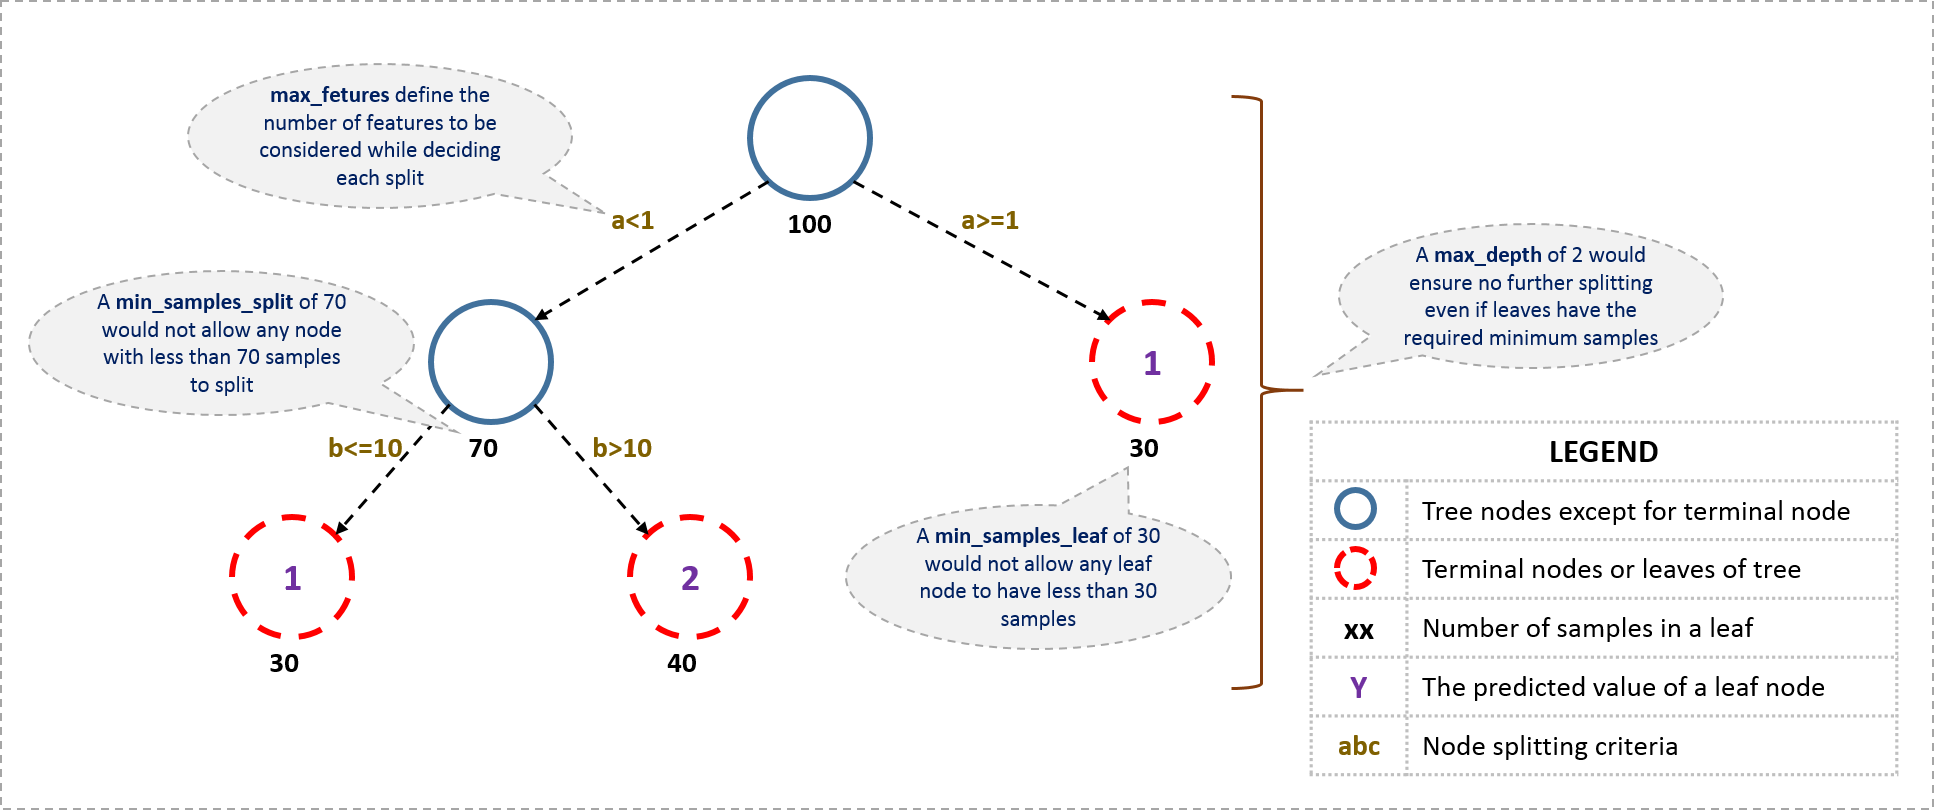

1. __min_samples_split__

    - Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting. Used to control over-fitting. <br></br>
    - Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.<br></br>
    
    - Too high values can lead to under-fitting hence, it should be tuned using CV.<br></br>
    
    - This should be ~0.5-1% of total values. Since this is imbalanced class problem, we’ll take a small value from the range.
    
    
2. __min_samples_leaf__

    - Defines the minimum samples (or observations) required in a terminal node or leaf. Used to control over-fitting similar to min_samples_split.<br></br>
    - Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.<br></br>
3. __min_weight_fraction_leaf__

    - Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.<br></br>
    - <span class="mark">Only one of #2 and #3 should be defined.</span><br></br>
4. __max_depth__

    - The maximum depth of a tree.
    <br></br>
    - Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
    <br></br>
    - Should be tuned using CV. Should be chosen (5-8) based on the number of observations and predictors.
    <br></br>
5. __max_leaf_nodes__

    - The maximum number of terminal nodes or leaves in a tree. <br></br>
    - Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.<br></br>
    - <span class="mark">If this is defined, GBM will ignore max_depth.</span><br></br>
6. __max_features__

    - The number of features to consider while searching for a best split. These will be randomly selected.<br></br>
    - As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.<br></br>
    - Higher values can lead to over-fitting but depends on case to case.

### 2. Boosting Parameters

1. __learning_rate__

    - This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.<br></br>
    - Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.<br></br>
Lower values would require higher number of trees to model all the relations and will be computationally expensive.<br></br>
2. __n_estimators__

    - The number of sequential trees to be modeled (step 2)<br></br>
    - Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.<br></br>
3. __subsample__

    - The fraction of observations to be selected for each tree. Selection is done by random sampling.<br></br>
    - Values slightly less than 1 make the model robust by reducing the variance.<br></br>
    - Typical values ~0.8 generally work fine but can be fine-tuned further.<br></br>

### 3. Miscellaneous Parameters

##### Apart from these, there are certain miscellaneous parameters which affect overall functionality:

1. __loss__
    - It refers to the loss function to be minimized in each split.<br></br>
    - It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.<br></br>

2. __init__
    - This affects initialization of the output.<br></br>
    - This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM.<br></br>

3. __random_state__
    - The random number seed so that same random numbers are generated every time.<br></br>
    - This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.<br></br>
    - It can potentially result in overfitting to a particular random sample selected. We can try running models for different random samples, which is computationally expensive and generally not used.<br></br>

4. __verbose__
    - The type of output to be printed when the model fits. The different values can be:
            
            - 0: no output generated (default)
            
            - 1: output generated for trees in certain intervals
            
            - >1: output generated for all trees
5. __warm_start__
    - This parameter has an interesting application and can help a lot if used judicially.<br></br>
    - Using this, we can fit additional trees on previous fits of a model. It can save a lot of time and you should explore this option for advanced applications<br></br>
6. __presort__
    - Select whether to presort data for faster splits.<br></br>
    - It makes the selection automatically by default but it can be changed if needed.

___
___

# Gradient Boosting for Regression

Model 1 will be simply the mean of output column


Model 2 will predict the difference between the predicted and actual value of Model 1 i.e The residual will be calculated. We will see how much correct prediction Model 2 can make.

### __For Model1:__ (no ML model is involved in this stage)

- where pred1  = mean of salary column


- res1 = lpa - pred1


- res1 is the mistakes done by the model1 on the given data.


- ___output of model 1 will be pred 1___

 pseudo residual (res) = actual - pred 

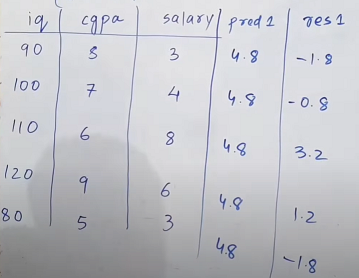

### __Now for Model2:__ 


- It will be a decision Tree. 


- For Training, input columns will be iq and cgpa and output column will be res1 


- where we will try to predict  res1 by model2 (decision_tree). We will not try to predict the actual salary (lpa) in pred2 but how much mistake model 1 has done that model 2 will try to predict correctly. 


- ___pred2 which is according to the decision tree.___ We will try to predict res1 in pred2 through the Decision tree


- here it is an overfitting model that why res1 and pred2 looks same.

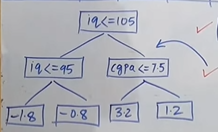

#### Prediction of model 2

- ___final output of model2 will be res2.___


- where y_pred after model 2  $\Longrightarrow y_{pred} = m_1 + \eta * m_2$ 


- $m_1\;=\;output\;of\;model_1\;(pred_1)\;\;\;\;and\;\;\;\;m_{2}\;=\;\;output\;of\;model_2\;(pred_2)\;$and $\eta$ is learning rate


- res2 = actual prediction(lpa) - y_pred after model2
    <br></br>
    - eg: res2 = 3 - (4.8 + 0.1 * (-1.8))
    

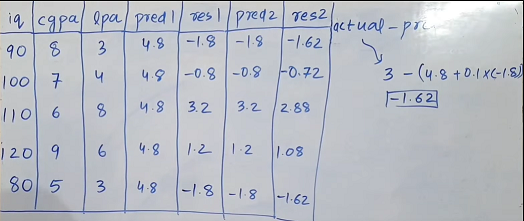

### __For Model3:__


- which is another Decision Tree


- input column will be same iq and cgpa but output which it will try to predict  will be res2


- it will try to predict the mistakes made by model1 and model2


- re3 < res2 i.e as the number of models will increase the residual will tend to zero.


- pred 3 is based on decision tree of model3


Now, $$y_{pred_3} = m_1 + \eta * m_2 + \eta * m_3$$

$\eta$ which is learning rate is used to overcome __overfitting__

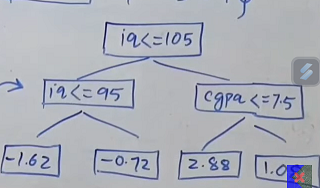

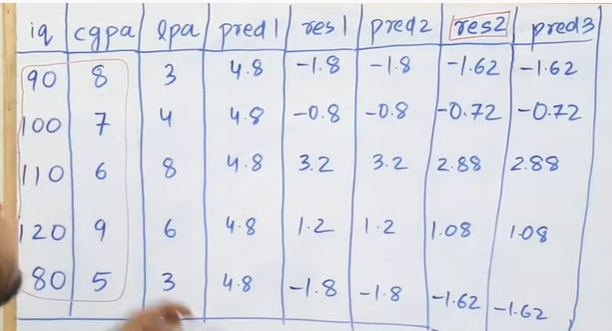

## Gradient Boosting from Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 *X[:,0]**2 + 0.05 * np.random.randn(100)

In [3]:
df = pd.DataFrame()

In [4]:
df['X'] = X.reshape(100)
df['y'] = y

In [5]:
df

X         y
0  -0.125460  0.051573
1   0.450714  0.594480
2   0.231994  0.166052
3   0.098658 -0.070178
4  -0.343981  0.343986
..       ...       ...
95 -0.006204 -0.040675
96  0.022733 -0.002305
97 -0.072459  0.032809
98 -0.474581  0.689516
99 -0.392109  0.502607

[100 rows x 2 columns]

Text(0.5, 1.0, 'X vs Y')

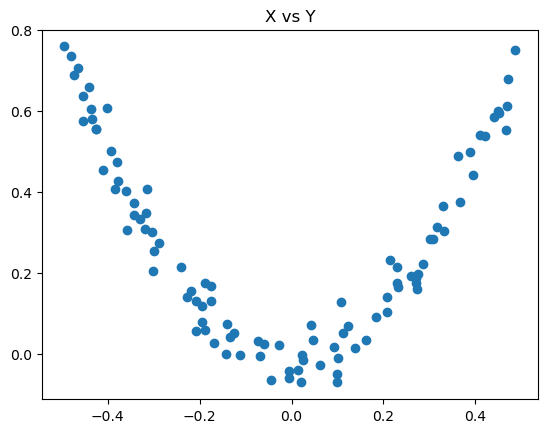

In [6]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

non-linear relationship between x and y

In [7]:
df['pred1'] = df['y'].mean()

In [8]:
df

X         y     pred1
0  -0.125460  0.051573  0.265458
1   0.450714  0.594480  0.265458
2   0.231994  0.166052  0.265458
3   0.098658 -0.070178  0.265458
4  -0.343981  0.343986  0.265458
..       ...       ...       ...
95 -0.006204 -0.040675  0.265458
96  0.022733 -0.002305  0.265458
97 -0.072459  0.032809  0.265458
98 -0.474581  0.689516  0.265458
99 -0.392109  0.502607  0.265458

[100 rows x 3 columns]

In [9]:
df['res1'] = df['y'] - df['pred1']

In [10]:
df

X         y     pred1      res1
0  -0.125460  0.051573  0.265458 -0.213885
1   0.450714  0.594480  0.265458  0.329021
2   0.231994  0.166052  0.265458 -0.099407
3   0.098658 -0.070178  0.265458 -0.335636
4  -0.343981  0.343986  0.265458  0.078528
..       ...       ...       ...       ...
95 -0.006204 -0.040675  0.265458 -0.306133
96  0.022733 -0.002305  0.265458 -0.267763
97 -0.072459  0.032809  0.265458 -0.232650
98 -0.474581  0.689516  0.265458  0.424057
99 -0.392109  0.502607  0.265458  0.237148

[100 rows x 4 columns]

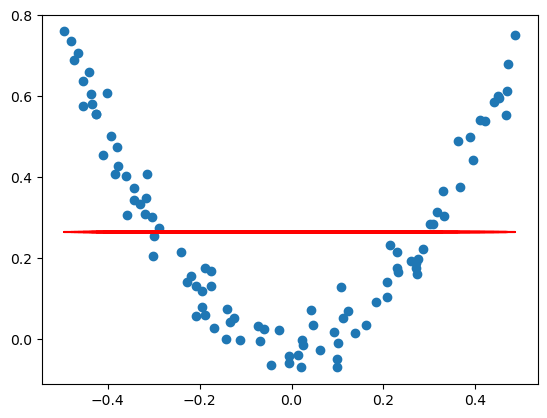

In [11]:
# scatter plot for m1 model
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [12]:
from sklearn.tree import DecisionTreeRegressor

##### Unlike Adaboost the max_leaf_nodes will range between 8 to 32 instead of 1.

In [13]:
tree1  = DecisionTreeRegressor(max_leaf_nodes=8)

In [14]:
# decision tree with X as input and res1 as output

tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [15]:
tree1.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 8,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

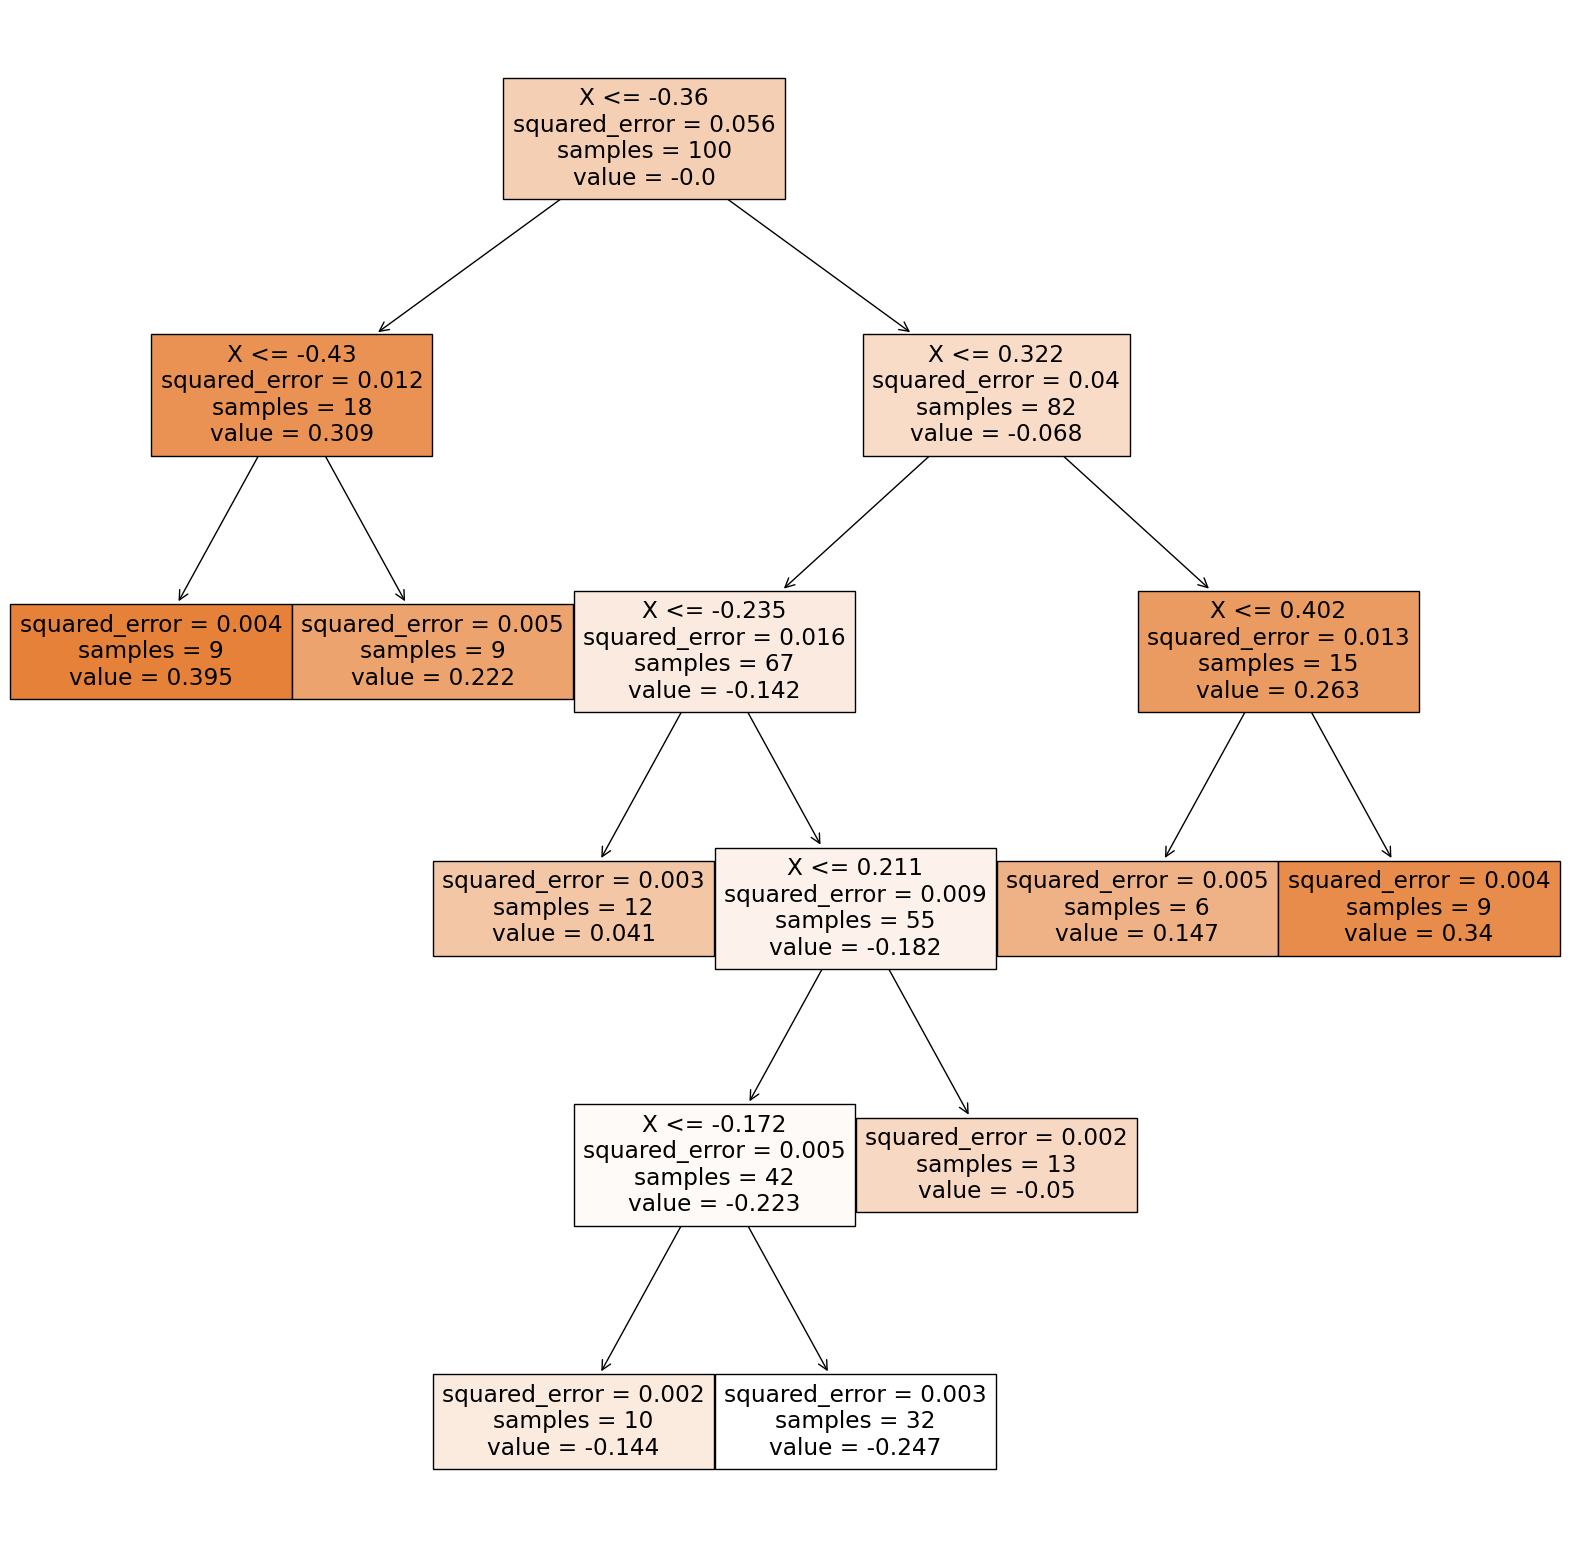

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(tree1,filled=True,feature_names=df.columns)
plt.show()

##### value is average of all the points in that particular leaf

In [17]:
# generating X_test

X_test = np.linspace(-0.5, 0.5, 500)

In [18]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500,1)) # model1 + learning rate* m2

# 0.265458 is mean of 1st model1

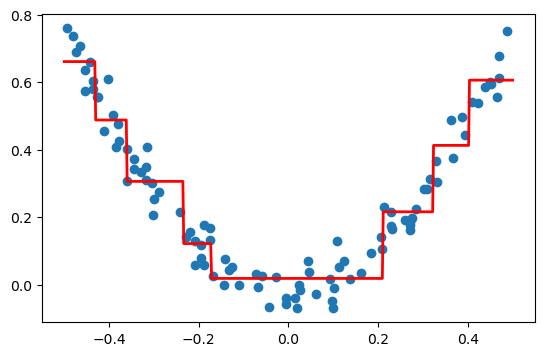

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth =2, color= 'red')
plt.scatter(df['X'],df['y'])

this is the prediction of model1 + model2

In [20]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1)) # overall prediction from 1st stage

In [21]:
df

X         y     pred1      res1     pred2
0  -0.125460  0.051573  0.265458 -0.213885  0.018319
1   0.450714  0.594480  0.265458  0.329021  0.605884
2   0.231994  0.166052  0.265458 -0.099407  0.215784
3   0.098658 -0.070178  0.265458 -0.335636  0.018319
4  -0.343981  0.343986  0.265458  0.078528  0.305964
..       ...       ...       ...       ...       ...
95 -0.006204 -0.040675  0.265458 -0.306133  0.018319
96  0.022733 -0.002305  0.265458 -0.267763  0.018319
97 -0.072459  0.032809  0.265458 -0.232650  0.018319
98 -0.474581  0.689516  0.265458  0.424057  0.660912
99 -0.392109  0.502607  0.265458  0.237148  0.487796

[100 rows x 5 columns]

In [22]:
df['res2'] = df['y'] - df['pred2']

In [23]:
df

X         y     pred1      res1     pred2      res2
0  -0.125460  0.051573  0.265458 -0.213885  0.018319  0.033254
1   0.450714  0.594480  0.265458  0.329021  0.605884 -0.011404
2   0.231994  0.166052  0.265458 -0.099407  0.215784 -0.049732
3   0.098658 -0.070178  0.265458 -0.335636  0.018319 -0.088497
4  -0.343981  0.343986  0.265458  0.078528  0.305964  0.038022
..       ...       ...       ...       ...       ...       ...
95 -0.006204 -0.040675  0.265458 -0.306133  0.018319 -0.058994
96  0.022733 -0.002305  0.265458 -0.267763  0.018319 -0.020624
97 -0.072459  0.032809  0.265458 -0.232650  0.018319  0.014489
98 -0.474581  0.689516  0.265458  0.424057  0.660912  0.028604
99 -0.392109  0.502607  0.265458  0.237148  0.487796  0.014810

[100 rows x 6 columns]

In [24]:
# input will be X and output will res2

tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [25]:
tree2.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 8,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [26]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1, tree2]) 

# 0.265458 + prediction of tree1 and prediction of tree 2
# here learning rate is 1 insted of 0.1

Text(0.5, 1.0, 'X vs y')

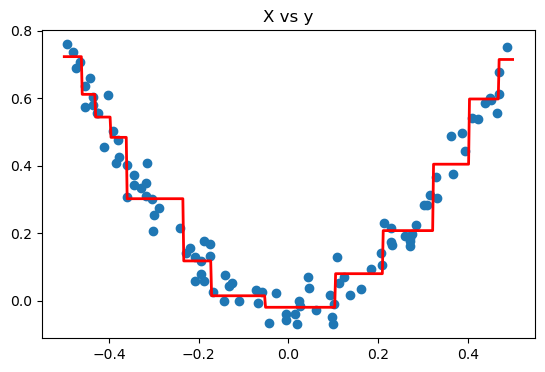

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth =2, color = 'red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

this is output of all 3 models

In [28]:
# function for gradient boost using recursion

def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):
    
    if number == 0:
        return
    else:
        # do gradeint boosting
        
        if count > 1:
            y = y - regs[-1].predict(X)
        else:
            foo =y
            
        tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree_reg.fit(X,y)
        
        regs.append(tree_reg)
        
        x1 = np.linspace(-0.5, 0.5, 500)
        y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)
        
        print(number)
        plt.figure()
        plt.plot(x1, y_pred, linewidth =2)
        plt.plot(X[:,0], foo, "r.")
        plt.show()
        
        gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


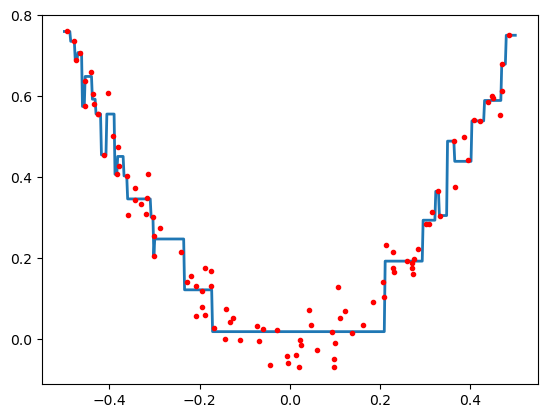

4


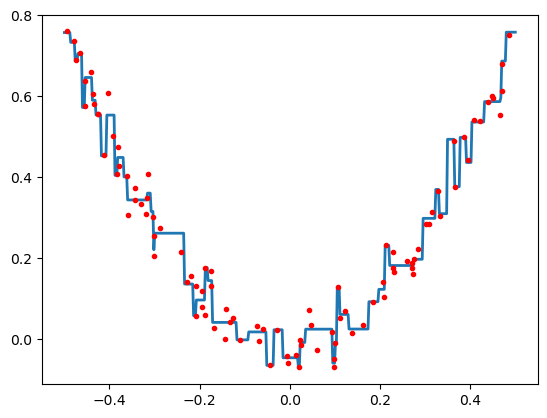

3


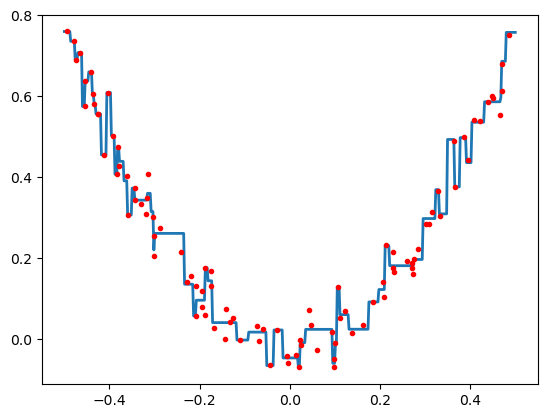

2


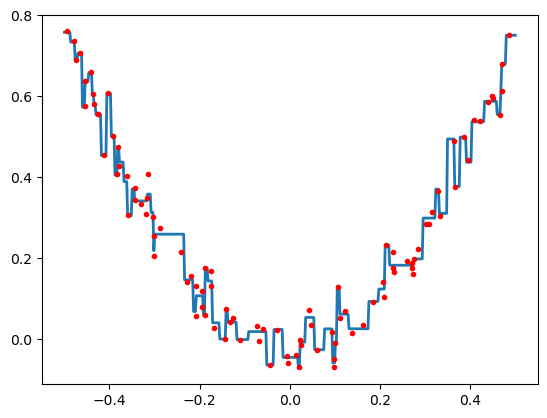

1


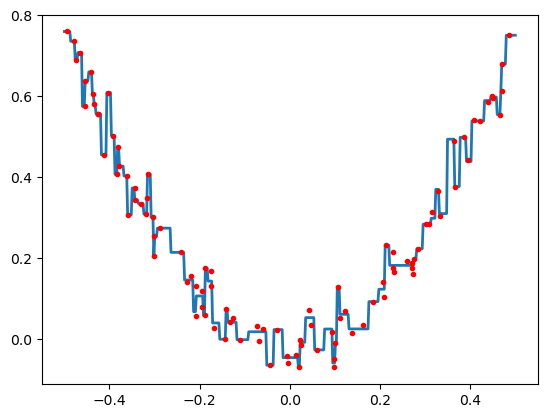

In [29]:
np.random.seed(42)
X= np.random.rand(100,1) - 0.5
y =3 * X[:,0] ** 2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1) # 5 models

overfitting

***

### Gradient Boosting (Regression) Maths

Maths behind Gradient Boosting regressor Campus X : https://www.youtube.com/watch?v=nMNiTZm-qY0&list=PLKnIA16_RmvaMPgWfHnN4MXl3qQ1597Jw&index=2

Maths Behind Gradient Boosting regressor Statsquest: https://www.youtube.com/watch?v=2xudPOBz-vs&list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6&index=2 

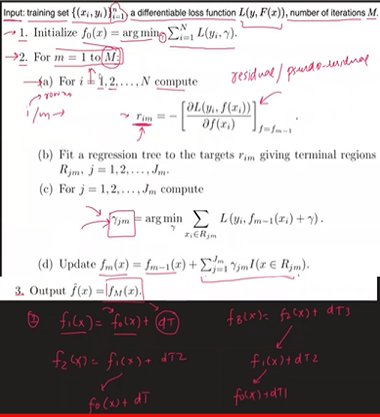

#### Addative Modelling:

adding small small models to predict results.

In [30]:
df = pd.read_csv(r'sample.csv')
df

# output to predict is Profit

R&D Spend  Administration  Marketing Spend  Profit
0      165.0           137.0            472.0   192.0
1      101.0            92.0            250.0   144.0
2       29.0           127.0            201.0    91.0

Loss Function used will be Least Square Error. As it id differentiable at any point.


$$L\;=\;\frac{1}{2}*\;\sum_{i=1}^n (y_i - \hat y)^2$$

Diving by $\frac{1}{2}$ to make numbers samller. It won't affect negatively

#### Step 1 :

We want to achieve:

$$f(x) = f_{0}(x)\;+\;f_{1}(x)\;+\;f_{2}(x)\;+\;....\;+\;f_{n}(x)$$ 

where $f_{0}(x),\;f_{1}(x)....\;f_{n}(x)$ are different Decision Trees.


This will be achieved through the below formula:

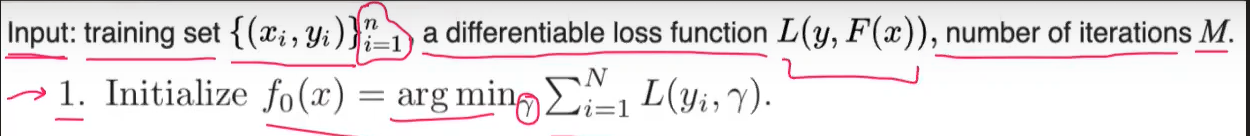

- $x_{i}$ is the inputs and $y_{i}$ is the output of each row


- and L is the loss function i.e least squared error here $(y_{i}-\hat y_{i})^2$ 


- we can take any loss function, but it should be differentiable

__Calculating $f_{0}(x)$__

$$f_{0}(x)\;=\;agrmin_{\gamma}*\;\frac{1}{2}*\;\sum_{i=1}^n (y_i - \hat y)^2$$

where $gamma\;(\gamma)\;=\;\hat y\;$ which is the predicted value

we want that value of gamma $(\gamma)$ for which the entire $f_{0}(x)$ is minimum.

##### differentiating wrt $\gamma\;or\;\hat y$



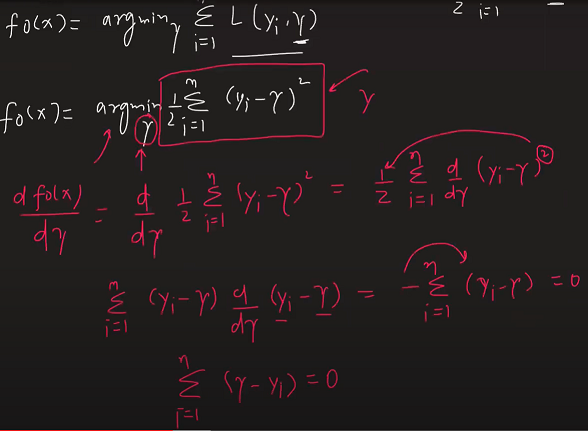

so as we have 3 rows. so n = 3. 

$$\sum_{i=1}^3 (\gamma - y_{i})\;=\;0$$


$$(\gamma - 192)\;+\;(\gamma - 144)\;+\;(\gamma - 91)\;=\;0$$

$$3\gamma\;=\;192+144+91$$

$$\gamma\;=\;\frac{192+144+91}{3}$$


$$\gamma\;=142.33333\;$$

so here for $\gamma$ we are taking the mean of the output column as we are using Least Square as Loss function


##### Hence we can now see that why output of Model 1 was mean of the entire column

In [31]:
df['f_0(x)'] = df['Profit'].mean()

In [32]:
df

R&D Spend  Administration  Marketing Spend  Profit      f_0(x)
0      165.0           137.0            472.0   192.0  142.333333
1      101.0            92.0            250.0   144.0  142.333333
2       29.0           127.0            201.0    91.0  142.333333



#### Step : 2

this step will be repeated M times

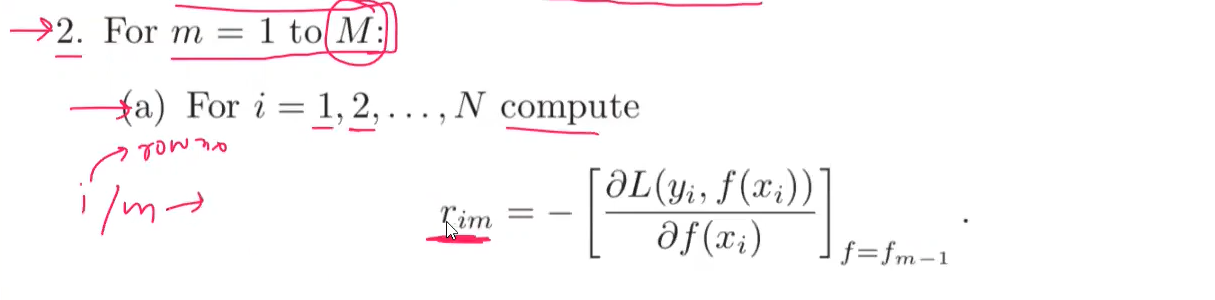

where 
- i = row number, 


- m = on which particular decision tree we are working, 


- __r = residual/pseudo residual__

so we need to find, for every decision tree we have to find "r" for every row in the datatset.

$f(x_{i}) = \hat y_{i}$

here m = 1 for first row

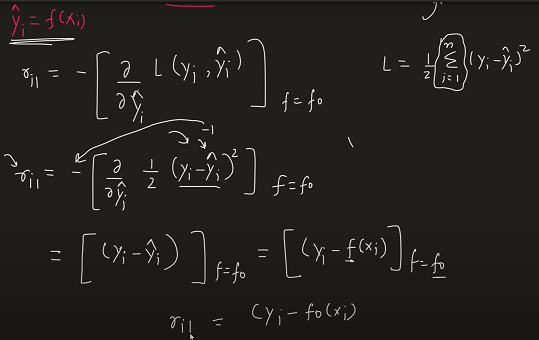

###### pseudo residual values for all the rows for first decision tree : 

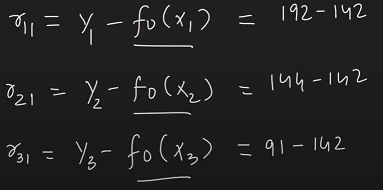

In [33]:
# residuals r_i1

df['r_i1'] = df['Profit'] - df['f_0(x)']

In [34]:
df

R&D Spend  Administration  Marketing Spend  Profit      f_0(x)       r_i1
0      165.0           137.0            472.0   192.0  142.333333  49.666667
1      101.0            92.0            250.0   144.0  142.333333   1.666667
2       29.0           127.0            201.0    91.0  142.333333 -51.333333

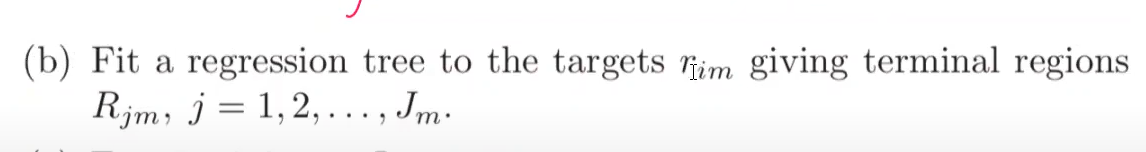

j is terminal regions which is region after split due to decision tree boundary

we need to take R&D_Spend, Administration, Marketing_Spend as Input and r_i1 as ouput and fit a regression tree

In [35]:
dt1 = DecisionTreeRegressor(max_depth=1) # small data tha's why depth is 1

In [36]:
dt1.fit(df.iloc[:,0:3].values,df['r_i1'].values)

DecisionTreeRegressor(max_depth=1)

In [37]:
dt1.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

[Text(0.5, 0.75, 'R&D Spend <= 65.0\nsquared_error = 1701.556\nsamples = 3\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -51.333'),
 Text(0.75, 0.25, 'squared_error = 576.0\nsamples = 2\nvalue = 25.667')]

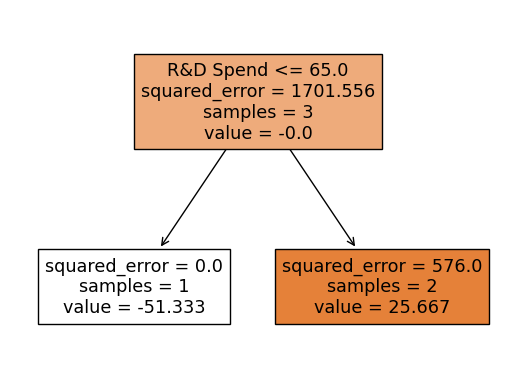

In [38]:
from sklearn.tree import plot_tree
plot_tree(dt1,filled=True,feature_names=df.columns)

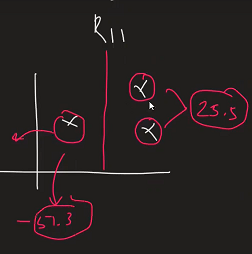

##### value is prediction of decision tree i.e mean of all the values in that terminal

### Now output of gradient boosting:

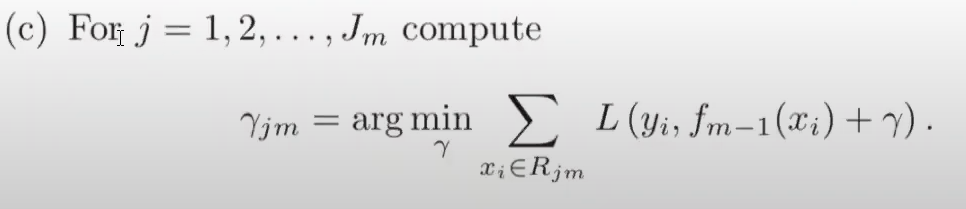

Gradient Boosting Output values of all terminal regions = $\gamma_{jm}$ where value of m =1

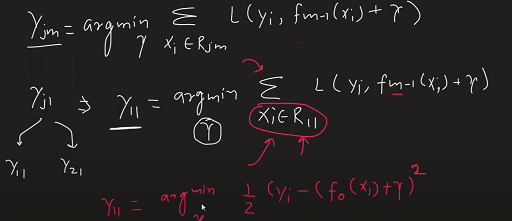

for argmin we need to differentitate Loss function wrt $\gamma$

summation not being used as we have only 1 row

we have to only take rows in $X_{i}$ which are taken by $R_{11}$

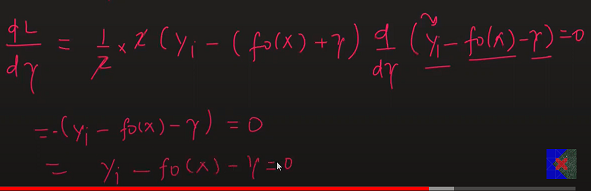

Output of leaf 1 from gradient boosting side

In [39]:
df

R&D Spend  Administration  Marketing Spend  Profit      f_0(x)       r_i1
0      165.0           137.0            472.0   192.0  142.333333  49.666667
1      101.0            92.0            250.0   144.0  142.333333   1.666667
2       29.0           127.0            201.0    91.0  142.333333 -51.333333

In [40]:
df.iloc[2,:]

R&D Spend           29.000000
Administration     127.000000
Marketing Spend    201.000000
Profit              91.000000
f_0(x)             142.333333
r_i1               -51.333333
Name: 2, dtype: float64

$f_{0}(x) = 142\;and\;y_{i} = 91(Profit)$

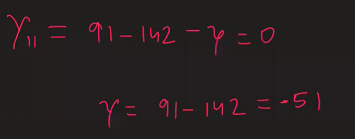

[Text(0.5, 0.75, 'R&D Spend <= 65.0\nsquared_error = 1701.556\nsamples = 3\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -51.333'),
 Text(0.75, 0.25, 'squared_error = 576.0\nsamples = 2\nvalue = 25.667')]

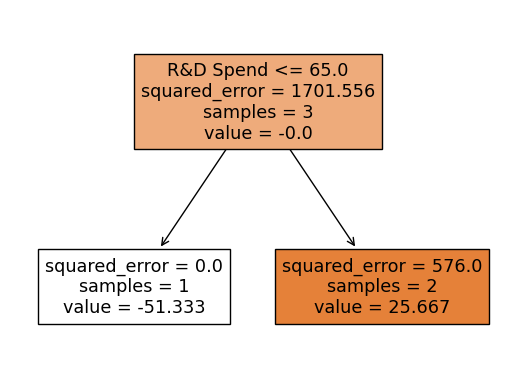

In [41]:
plot_tree(dt1,filled=True,feature_names=df.columns)

which is same as or output from leaf node1 from decision tree 1

##### now, for next leaf node:
 
 summation will be used as there are 2 rows

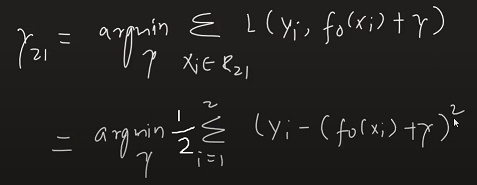

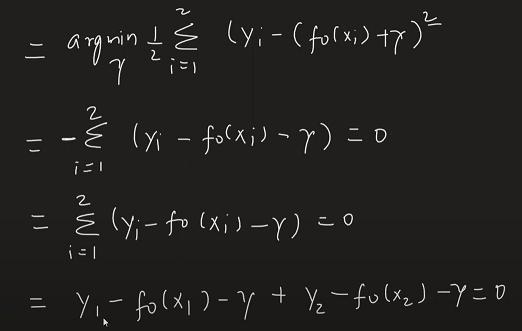

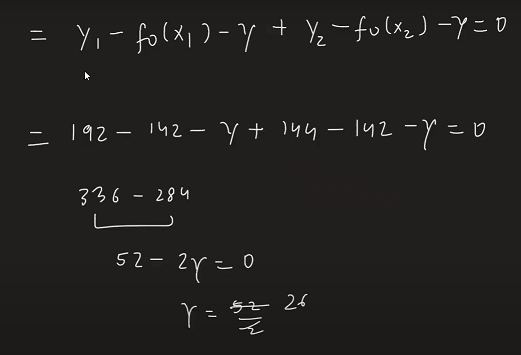

[Text(0.5, 0.75, 'R&D Spend <= 65.0\nsquared_error = 1701.556\nsamples = 3\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -51.333'),
 Text(0.75, 0.25, 'squared_error = 576.0\nsamples = 2\nvalue = 25.667')]

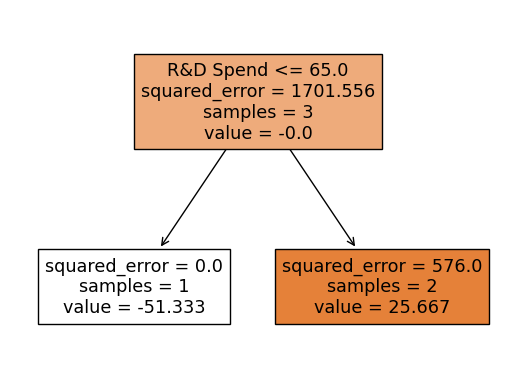

In [42]:
plot_tree(dt1,filled=True,feature_names=df.columns)

which comes out to be nearly as same as our decision tree output  as we are using Least square as our loss function.

**but in case of least square not being our Loss function, the results will differ**

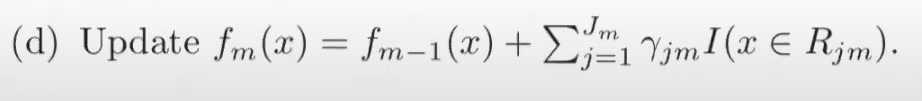

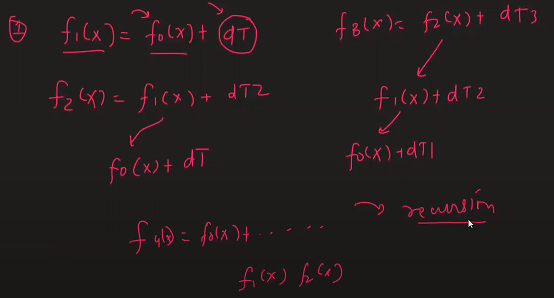

##### Step 3: Will be output

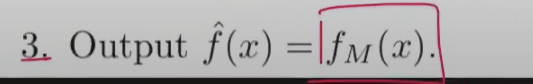

___

## Maths Behind Gradient_Boosting_Classifier (Statsquest) : (Yet to finish)

## Done by CampusX

https://www.youtube.com/watch?v=StWY5QWMXCw&list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6&index=5